<h1 style="text-align: center">Happiness Prediction</h1>

In [2]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

pd.reset_option("display.max_columns")
pd.reset_option("display.max_rows")

/usr/local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
df = pd.read_csv('Somerville_happiness.csv', sep=',', header=0)
df = df[df.year == 2021] # Only data from 2011 
df.head()
df[['Annual household income', 'Housing satisfaction']]

df7 = pd.read_csv('Somerville_happiness_v2.csv', sep=',', header=0)
df7.head()
# df7[['Annual household income', 'Housing satisfaction']]

,Life satisfaction,Neighborhood satisfaction,Housing satisfaction,Community events availability,Sense of security,Annual household income,Gender,Age,Living with children under 18,Is disabled
0,9,9,9,5,9,87499.5,Female,55-64,0,0
1,8,7,6,4,6,87499.5,Male,65-74,0,1
2,7,8,3,4,5,62499.5,Female,25-34,0,0
3,3,8,8,1,4,62499.5,Female,35-44,0,0
4,5,7,7,4,7,124999.5,Male,55-64,1,0


In [4]:
# for i in ['Annual household income', 'Housing satisfaction', 'Living with children under 18', 'Life satisfaction']:
#     plt.figure()
#     plt.hist(df[i].cumsum())
#     plt.show()

In [5]:
# prior_predictive_dist = CmdStanModel(stan_file='model1_ppc.stan')

# # Compilation of code_1.stan and get 1000 samples
# samples = prior_predictive_dist.sample(fixed_param=True, 
#                                        iter_sampling=1000)

# # Creation of pandas dataframe from resulting draws
# df = samples.draws_pd()
# display(df)

# # Compute ratio of allergic reactions for each sample
# ratio = df['y'] / df['N']

# predictors = df[['Annual household income', 'Housing satisfaction']].head(100).to_numpy()
# print(df['Housing satisfaction'].unique())
# print(predictors)
# predictors = predictors/predictors.max(axis=0)
# # predictors = predictors-predictors.mean(axis=0)
# target = df['Life satisfaction'].head(100).to_numpy().astype('int')
# print(target)
# print(predictors)
# xd = CmdStanModel(stan_file='test.stan')

# d = {'K' : 10,
#      'N' : 100,
#      'J' : 2,
#      'y' : target,
#      'X' : predictors}

# # Compilation of code_1.stan and get 1000 samples
# samples = xd.sample(data=d, fixed_param=True, iter_sampling=1000, iter_warmup=1000, chains=1)
# print(samples.diagnose())

# # Creation of pandas dataframe from resulting draws
# df_old = samples.draws_pd()
# display(df_old)

# Compute ratio of allergic reactions for each sample
# ratio = df['y'] / df['N']

# prior = CmdStanModel(stan_file='test3.stan')
# samples = prior.sample(fixed_param=True, 
#                                        iter_sampling=1000)

# df = samples.draws_pd()
# df.head(10)

In [6]:

# df_old.hist(column='happy[93]')
# plt.show()
# plt.figure()
# plt.hist()
# plt.show()

In [7]:


# predictors = predictors/predictors.max(axis=0)
# predictors = predictors-predictors.mean(axis=0)
target = df['Life satisfaction'].head(100).to_numpy().astype('int')


xd = CmdStanModel(stan_file='test2.stan')

income = df['Annual household income'].head(100).to_numpy().astype('int')
income = (income/income.std(axis=0))
income = income-income.mean(axis=0)

print(income)
d = {'N' : 100,
     'K' : 10,
     'y' : target,
     'income' : income,
     'satisfaction' : df['Housing satisfaction'].head(100).to_numpy().astype('int'),
     'child' : df['Living with children under 18'].head(100).to_numpy().astype('int')}

# Compilation of code_1.stan and get 1000 samples
samples = xd.sample(data=d, iter_sampling=1000, iter_warmup=1000, chains=4)
print(samples.diagnose())

# Creation of pandas dataframe from resulting draws
df_res = samples.draws_pd()
display(df_res)

# Compute ratio of allergic reactions for each sample
# ratio = df['y'] / df['N']

INFO:cmdstanpy:compiling stan file /home/Final project/test2.stan to exe file /home/Final project/test2


INFO:cmdstanpy:compiled model executable: /home/Final project/test2
--- Translating Stan model to C++ code ---
bin/stanc  --o=/tmp/tmpwzwek299/tmpnxbe6nvq.hpp /tmp/tmpwzwek299/tmpnxbe6nvq.stan
Warning in '/tmp/tmpwzwek299/tmpnxbe6nvq.stan', line 6, column 2: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in '/tmp/tmpwzwek299/tmpnxbe6nvq.stan', line 9, column 2: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in '/tmp/tmpwzwek299/tmpnxbe6nvq.stan', line 12, column 2: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 

[ 0.23761586 -0.40423158 -0.40423158 -0.83212986 -0.83212986  0.23761586
  0.23761586  1.09341243 -0.83212986  1.69248715 -0.83212986 -0.83212986
  0.23761586 -0.46278518 -1.81627881 -0.40423158 -1.26002815  1.69248715
 -0.40423158  0.23761586  1.69248715  0.23761586  1.69248715  0.23761586
 -1.26002815 -0.83212986  0.23761586 -0.83212986 -0.46278518 -0.46278518
  1.09341243 -1.26002815 -0.46278518  0.23761586 -1.60234678 -1.81627881
  0.23761586 -0.83212986  1.09341243 -0.83212986  0.23761586  0.23761586
  0.23761586  1.09341243 -0.40423158 -1.26002815 -1.26002815  1.69248715
 -1.26002815  1.69248715 -0.46278518  1.09341243  1.09341243 -0.83212986
  1.09341243  0.23761586  0.23761586 -1.26002815 -0.46278518  1.09341243
  1.09341243  1.69248715 -1.26002815 -1.26002815 -0.83212986 -0.83212986
 -0.46278518  0.23761586 -0.83212986 -0.83212986  0.23761586  1.09341243
 -0.40423158  1.69248715 -0.46278518  1.09341243 -1.60234678  0.23761586
  0.23761586  0.23761586  0.23761586 -0.83212986  0

chain 1 |          | 00:00 Status





chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▎        | 00:01 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:02 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:02 Iteration:  300 / 2000 [ 15%]  (Warmup)

chain 1 |██▋       | 00:02 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:03 Iteration:  500 / 2000 [ 25%]  (Warmup)




chain 1 |███▋      | 00:03 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:03 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:03 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:04 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:04 Iteration: 1001 / 2000 [ 50%]  (Sampling)
chain 1 |██████▎   | 00:05 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:05 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  | 00:05 Iteration: 1300 / 2000 [ 65%]  (


INFO:cmdstanpy:CmdStan done processing.



Processing csv files: /tmp/tmpzfeie_0l/test2-20230709042608_1.csv, /tmp/tmpzfeie_0l/test2-20230709042608_2.csv, /tmp/tmpzfeie_0l/test2-20230709042608_3.csv, /tmp/tmpzfeie_0l/test2-20230709042608_4.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
6 of 4000 (0.15%) transitions ended with a divergence.
These divergent transitions indicate that HMC is not fully able to explore the posterior distribution.
Try increasing adapt delta closer to 1.
If this doesn't remove all divergences, try to reparameterize the model.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete.



,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,c[1],c[2],c[3],...,happy[91],happy[92],happy[93],happy[94],happy[95],happy[96],happy[97],happy[98],happy[99],happy[100]
0,-220.476,0.978118,0.085840,6.0,63.0,0.0,228.690,-5.68588,-4.63848,-2.47689,...,9.0,8.0,8.0,5.0,7.0,7.0,8.0,8.0,5.0,7.0
1,-217.642,0.998288,0.085840,6.0,63.0,0.0,227.216,-3.60248,-3.45231,-2.30237,...,9.0,5.0,7.0,9.0,6.0,9.0,7.0,7.0,8.0,6.0
2,-222.078,0.924915,0.085840,5.0,31.0,0.0,231.828,-3.51499,-3.44127,-2.01582,...,7.0,10.0,6.0,9.0,6.0,8.0,8.0,8.0,6.0,6.0
3,-223.562,0.789131,0.085840,6.0,63.0,0.0,235.310,-7.51139,-4.71838,-2.60418,...,8.0,4.0,6.0,7.0,4.0,3.0,4.0,8.0,7.0,8.0
4,-224.165,0.161257,0.085840,5.0,31.0,0.0,231.456,-6.14611,-3.33617,-1.59692,...,10.0,8.0,9.0,6.0,4.0,8.0,8.0,9.0,8.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,-220.092,0.969686,0.078396,6.0,63.0,0.0,228.526,-5.97896,-4.99265,-3.08996,...,8.0,7.0,5.0,10.0,7.0,8.0,8.0,5.0,7.0,8.0
3996,-219.565,0.456868,0.078396,6.0,63.0,0.0,230.963,-6.89179,-4.59785,-2.02676,...,7.0,8.0,9.0,10.0,7.0,4.0,3.0,3.0,6.0,9.0
3997,-220.445,0.992842,0.078396,6.0,63.0,0.0,230.751,-3.05537,-2.99849,-1.93539,...,9.0,6.0,9.0,9.0,5.0,8.0,7.0,3.0,8.0,8.0
3998,-223.349,0.941887,0.078396,5.0,31.0,0.0,230.767,-2.96816,-2.89843,-1.97523,...,9.0,9.0,3.0,9.0,7.0,8.0,7.0,9.0,5.0,9.0


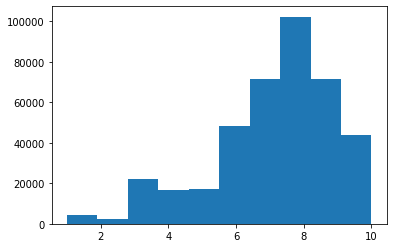

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,c[1],c[2],c[3],c[4],c[5],c[6],c[7],c[8],c[9],beta_income,beta_satisfy[1],beta_satisfy[2],beta_satisfy[3],beta_satisfy[4],beta_satisfy[5],beta_satisfy[6],beta_satisfy[7],beta_satisfy[8],beta_satisfy[9],beta_satisfy[10],beta_child,happy[1],happy[2],happy[3],happy[4],happy[5],happy[6],happy[7],happy[8],happy[9],happy[10],happy[11],happy[12],happy[13],happy[14],happy[15],happy[16],happy[17],happy[18],happy[19],happy[20],happy[21],happy[22],happy[23],happy[24],happy[25],happy[26],happy[27],happy[28],happy[29],happy[30],happy[31],happy[32],happy[33],happy[34],happy[35],happy[36],happy[37],happy[38],happy[39],happy[40],happy[41],happy[42],happy[43],happy[44],happy[45],happy[46],happy[47],happy[48],happy[49],happy[50],happy[51],happy[52],happy[53],happy[54],happy[55],happy[56],happy[57],happy[58],happy[59],happy[60],happy[61],happy[62],happy[63],happy[64],happy[65],happy[66],happy[67],happy[68],happy[69],happy[70],happy[71],happy[72],happy[73],happy[74],happy[75],happy[76],happy[77],happy[78],happy[79],happy[80],happy[81],happy[82],happy[83],happy[84],happy[85],happy[86],happy[87],happy[88],happy[89],happy[90],happy[91],happy[92],happy[93],happy[94],happy[95],happy[96],happy[97],happy[98],happy[99],happy[100]
0,-220.476,0.978118,0.085840,6.0,63.0,0.0,228.690,-5.68588,-4.63848,-2.47689,-1.68137,-1.172490,-0.441779,0.447932,1.69897,2.69753,0.097263,-1.457040,-1.452320,-0.661129,-0.545389,-0.150320,-0.111382,0.333873,0.468418,0.633826,0.767543,0.424844,8.0,7.0,4.0,7.0,8.0,8.0,5.0,8.0,10.0,10.0,9.0,6.0,6.0,3.0,8.0,7.0,8.0,6.0,7.0,3.0,10.0,6.0,8.0,8.0,6.0,3.0,6.0,10.0,6.0,5.0,9.0,3.0,8.0,10.0,6.0,5.0,9.0,9.0,9.0,6.0,8.0,4.0,10.0,8.0,9.0,6.0,10.0,6.0,8.0,7.0,8.0,6.0,8.0,7.0,8.0,8.0,5.0,7.0,8.0,4.0,7.0,8.0,7.0,8.0,3.0,10.0,10.0,4.0,7.0,6.0,8.0,9.0,9.0,8.0,7.0,9.0,8.0,8.0,8.0,8.0,7.0,6.0,3.0,8.0,4.0,7.0,6.0,6.0,6.0,9.0,9.0,8.0,8.0,5.0,7.0,7.0,8.0,8.0,5.0,7.0
1,-217.642,0.998288,0.085840,6.0,63.0,0.0,227.216,-3.60248,-3.45231,-2.30237,-1.96118,-1.657500,-0.727498,0.172012,1.25323,2.95567,0.260228,-1.187900,-0.359334,-0.242418,0.042447,0.276212,0.301458,0.321999,0.417725,0.549674,1.436900,-0.257559,8.0,3.0,6.0,8.0,9.0,7.0,3.0,9.0,4.0,7.0,9.0,6.0,10.0,8.0,5.0,7.0,8.0,8.0,6.0,7.0,8.0,7.0,9.0,8.0,8.0,6.0,9.0,8.0,4.0,7.0,7.0,8.0,6.0,7.0,3.0,3.0,8.0,9.0,4.0,6.0,8.0,1.0,8.0,6.0,8.0,7.0,8.0,7.0,9.0,8.0,9.0,9.0,9.0,8.0,6.0,6.0,9.0,8.0,7.0,9.0,6.0,9.0,10.0,8.0,9.0,8.0,8.0,4.0,7.0,8.0,8.0,9.0,8.0,8.0,9.0,9.0,6.0,8.0,7.0,8.0,9.0,9.0,3.0,7.0,7.0,8.0,9.0,8.0,8.0,9.0,9.0,5.0,7.0,9.0,6.0,9.0,7.0,7.0,8.0,6.0
2,-222.078,0.924915,0.085840,5.0,31.0,0.0,231.828,-3.51499,-3.44127,-2.01582,-1.68330,-1.464250,-0.483933,0.440957,1.40147,3.01565,0.424839,-1.557510,-0.986548,-0.798420,-0.327679,-0.313699,-0.231098,-0.131328,0.296727,0.420996,1.452240,0.349003,8.0,7.0,7.0,6.0,9.0,8.0,8.0,7.0,6.0,9.0,8.0,3.0,7.0,7.0,8.0,9.0,8.0,8.0,7.0,6.0,9.0,9.0,10.0,6.0,10.0,6.0,9.0,6.0,7.0,7.0,8.0,5.0,7.0,8.0,7.0,5.0,7.0,8.0,9.0,6.0,5.0,7.0,9.0,7.0,6.0,3.0,7.0,8.0,10.0,9.0,10.0,9.0,7.0,6.0,10.0,8.0,8.0,8.0,3.0,7.0,3.0,9.0,6.0,7.0,1.0,10.0,8.0,3.0,8.0,8.0,10.0,9.0,1.0,8.0,8.0,9.0,5.0,8.0,10.0,7.0,8.0,3.0,9.0,7.0,9.0,6.0,6.0,8.0,8.0,3.0,7.0,10.0,6.0,9.0,6.0,8.0,8.0,8.0,6.0,6.0
3,-223.562,0.789131,0.085840,6.0,63.0,0.0,235.310,-7.51139,-4.71838,-2.60418,-2.12787,-1.996910,-1.337920,-0.509403,1.04597,2.28894,-0.082024,-1.290100,-0.829714,-0.703446,-0.683807,-0.554520,-0.372088,-0.269894,-0.240592,0.153545,0.593217,-0.116638,9.0,9.0,5.0,8.0,8.0,8.0,8.0,2.0,7.0,6.0,8.0,6.0,4.0,10.0,9.0,10.0,9.0,9.0,8.0,7.0,7.0,7.0,8.0,8.0,10.0,5.0,8.0,6.0,8.0,8.0,10.0,8.0,8.0,6.0,9.0,8.0,8.0,2.0,8.0,8.0,6.0,6.0,3.0,8.0,6.0,7.0,8.0,8.0,9.0,9.0,6.0,3.0,6.0,9.0,7.0,8.0,8.0,9.0,7.0,10.0,3.0,8.0,8.0,8.0,9.0,7.0,8.0,7.0,9.0,8.0,8.0,7.0,3.0,7.0,8.0,9.0,8.0,8.0,6.0,8.0,9.0,8.0,6.0,8.0,6.0,4.0,8.0,10.0,10.0,4.0,8.0,4.0,6.0,7.0,4.0,3.0,4.0,8.0,7.0,8.0
4,-224.165,0.161257,0.085840,5.0,31.0,0.0,231.456,-6.14611,-3.33617,-1.59692,-1.15721,-1.01

In [8]:
# for col in df_res.columns:
#     print(col)

model1_happy = samples.stan_variable('happy').flatten()



plt.hist(model1_happy)
plt.show()

pd.set_option('display.max_columns', None) 

# pd.set_option("display.max_rows", None)
display(df_res)
# print(df_res.columns)